In [1]:
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split

# chose dataset as interested in cars and plenty of data to use

In [2]:
import pandas as pd
pd.read_csv('/Users/fraser/Desktop/4th YEAR/Machine Learning/Python/auto-mpg.csv', engine = 'python')
data =pd.read_csv ('/Users/fraser/Desktop/4th YEAR/Machine Learning/Python/auto-mpg.csv',engine='python')
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


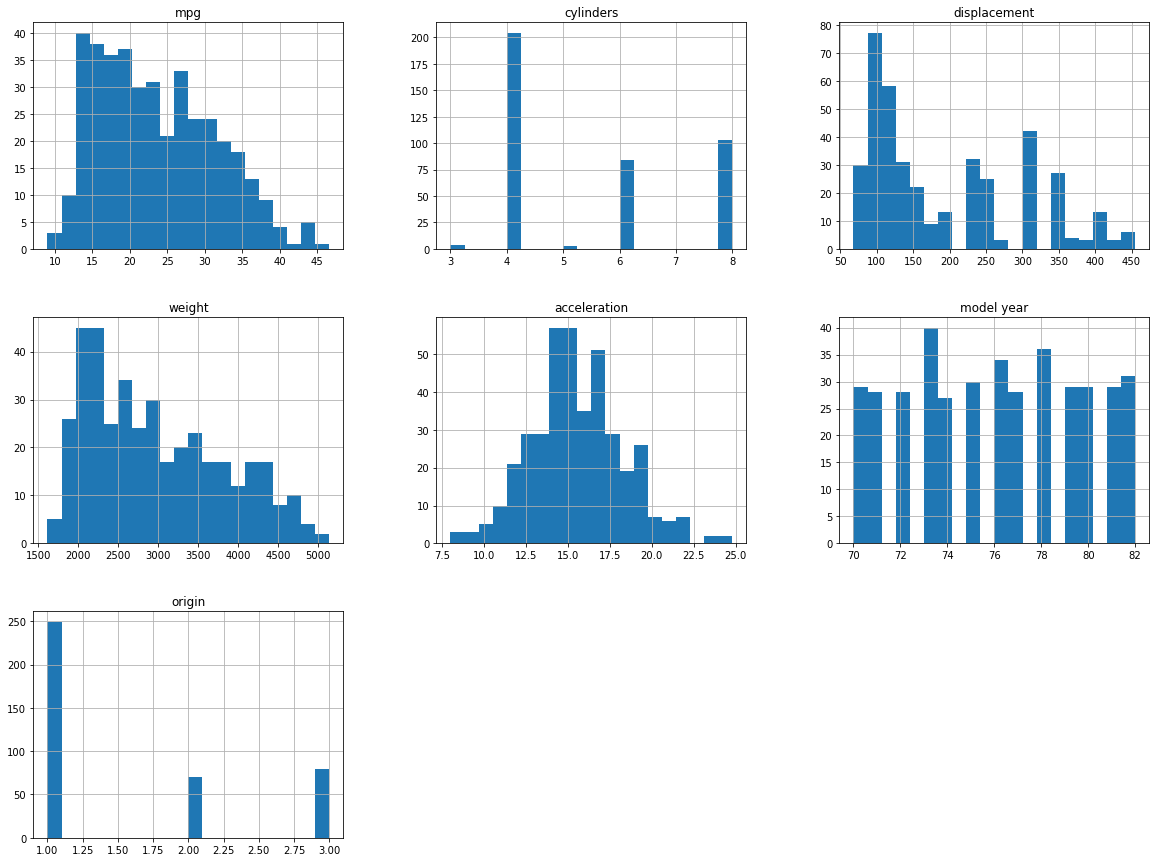

In [5]:
data.hist(bins=20, figsize=(20,15))
plt.show()

# Removing ?s noticed when looking at dataset 

In [6]:
data.horsepower.str.contains('\?').sum()

6

In [7]:
data.horsepower.replace('?',np.nan,inplace=True)

In [8]:
data.horsepower.str.contains('\?').sum()

0

In [9]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
data.dropna(subset=["horsepower"],axis=0,inplace=True)

In [11]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Changing hp to int to be used in nb classifier

In [13]:
data['horsepower'] = data['horsepower'].astype(str).astype(int)

In [14]:
from sklearn.naive_bayes import GaussianNB

# Find corraltion between car and its mpg

In [15]:
X = data[["cylinders","displacement", "weight", "acceleration", "horsepower"]]
y = data["mpg"]

In [16]:
y=y.astype('int')

In [17]:
X.head()

,cylinders,displacement,weight,acceleration,horsepower
0,8,307.0,3504,12.0,130
1,8,350.0,3693,11.5,165
2,8,318.0,3436,11.0,150
3,8,304.0,3433,12.0,150
4,8,302.0,3449,10.5,140


In [18]:
y.head()

0    18
1    15
2    18
3    16
4    17
Name: mpg, dtype: int64

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   weight        392 non-null    int64  
 3   acceleration  392 non-null    float64
 4   horsepower    392 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 18.4 KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

In [22]:
model = GaussianNB()

In [23]:
model.fit(Xtrain, ytrain)

GaussianNB()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
y_pred = model.predict(Xtrain)
y_pred


array([20, 14, 28, 27, 20, 31, 34, 34, 20, 29, 13, 17, 39, 23, 37, 27, 14,
       27, 18, 13, 28, 28, 44, 34, 18, 39, 13, 29, 27, 13, 27, 29, 34, 17,
       13, 17, 20, 14, 27, 27, 11, 14, 28, 34, 21, 14, 27, 20, 34, 13, 13,
       33, 29, 32, 14, 20, 15, 34, 34, 34, 12, 14, 18, 20, 13, 27, 13, 25,
       27, 27, 20, 18, 32, 27, 13, 27, 12, 29, 13, 17, 34, 18, 21, 18, 34,
       27, 39, 27, 28, 34, 13, 12, 28, 20, 33, 44, 20,  9, 27, 29, 18, 18,
       27, 28, 30, 37, 18, 17, 18, 39, 13, 13, 28, 18, 13, 11, 39, 18, 18,
       28, 27, 28, 27, 13, 28, 43, 18, 28, 27, 13, 34, 13, 27, 29, 13, 12,
       31, 18, 27, 14, 20, 28, 14, 34, 27, 14, 14, 29, 14, 18, 35, 37, 18,
       13, 13, 37, 34, 27, 27, 27, 34, 40, 14, 28, 20, 13, 27, 23, 34, 39,
       33, 28, 29, 18, 27, 27, 12, 17, 28, 13, 28, 11, 29, 39, 27, 39, 23,
       46, 14, 27, 20, 14, 27, 34, 34, 18, 28, 28, 34, 27, 20, 27, 13, 28,
       39, 34, 13, 31, 13, 27, 18, 34, 18, 34, 37, 18, 13, 33, 20, 14, 20,
       39, 34, 27, 13, 13

In [26]:
accuracy = accuracy_score(ytrain, y_pred)*100
accuracy

24.489795918367346

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(ytrain, y_pred, average='micro')*100

24.489795918367346

In [28]:
from sklearn.metrics import f1_score
f1_score(ytrain, y_pred, average='macro')*100

34.92804027425876

In [29]:
from sklearn import metrics

# Graph to show the corralation

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

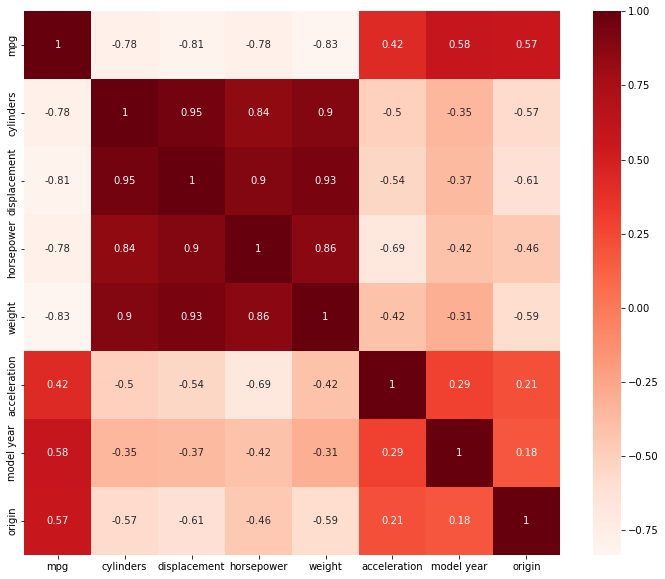

In [31]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [32]:
threshold = 0.5
a=abs(corr['mpg'])
result=a[a>threshold]
result 

mpg             1.000000
cylinders       0.777618
displacement    0.805127
horsepower      0.778427
weight          0.832244
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

In [33]:
data[['cylinders','displacement']].corr()

,cylinders,displacement
cylinders,1.000000,0.950823
displacement,0.950823,1.000000


In [34]:
data[['cylinders','horsepower']].corr()

,cylinders,horsepower
cylinders,1.000000,0.842983
horsepower,0.842983,1.000000


In [35]:
data[['weight','horsepower']].corr()

,weight,horsepower
weight,1.000000,0.864538
horsepower,0.864538,1.000000


In [36]:
df=data.drop(['cylinders', 'displacement', 'horsepower', 'weight'],1)
df.head()

,mpg,acceleration,model year,origin,car name
0,18.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,11.5,70,1,buick skylark 320
2,18.0,11.0,70,1,plymouth satellite
3,16.0,12.0,70,1,amc rebel sst
4,17.0,10.5,70,1,ford torino


In [37]:
data_1 = data.drop(['horsepower', 'weight', 'acceleration', 'model year', 'origin'],1)
data_1.head()

,mpg,cylinders,displacement,car name
0,18.0,8,307.0,chevrolet chevelle malibu
1,15.0,8,350.0,buick skylark 320
2,18.0,8,318.0,plymouth satellite
3,16.0,8,304.0,amc rebel sst
4,17.0,8,302.0,ford torino


In [38]:
data_2 = data.drop(['horsepower', 'acceleration', 'model year', 'origin'],1)
data_2.head()

,mpg,cylinders,displacement,weight,car name
0,18.0,8,307.0,3504,chevrolet chevelle malibu
1,15.0,8,350.0,3693,buick skylark 320
2,18.0,8,318.0,3436,plymouth satellite
3,16.0,8,304.0,3433,amc rebel sst
4,17.0,8,302.0,3449,ford torino


In [39]:
data_3 = data.drop([ 'acceleration', 'model year', 'origin'],1)
data_3.head()

,mpg,cylinders,displacement,horsepower,weight,car name
0,18.0,8,307.0,130,3504,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,buick skylark 320
2,18.0,8,318.0,150,3436,plymouth satellite
3,16.0,8,304.0,150,3433,amc rebel sst
4,17.0,8,302.0,140,3449,ford torino


In [40]:
x_1 = data_1[["cylinders","displacement"]]
y_1 = data_1["mpg"]

In [41]:
y_1=y_1.astype('int')

In [42]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(x_1, y_1, random_state = 1)

In [43]:
model = GaussianNB()

In [44]:
model.fit(Xtrain1, ytrain1)

GaussianNB()

In [45]:
y_pred1 = model.predict(Xtrain1)
y_pred1

array([18, 13, 34, 27, 18, 34, 27, 34, 18, 29, 13, 18, 40, 20, 37, 27, 14,
       27, 14, 13, 27, 27, 34, 34, 20, 46,  9, 34, 27, 13, 27, 34, 34, 14,
       14, 18, 20, 13, 27, 27, 13,  9, 27, 29, 20, 14, 27, 20, 43, 14, 13,
       37, 34, 26, 14, 18, 13, 34, 34, 43, 14, 14, 18, 20, 14, 27, 13, 25,
       27, 27, 20, 18, 26, 27, 13, 27, 14, 34, 14, 18, 34, 18, 26, 18, 34,
       27, 39, 27, 27, 34, 13, 12, 27, 18, 34, 43, 18,  9, 27, 37, 18, 18,
       27, 27, 25, 37, 18, 18, 18, 39, 14, 13, 27, 18, 14, 14, 40, 20, 20,
       27, 27, 27, 27, 14, 27, 43, 18, 34, 27, 14, 34, 14, 34, 34, 14, 14,
       31, 18, 27, 14, 20, 27,  9, 34, 27, 14, 13, 31, 14, 20, 29, 37, 20,
       13, 14, 37, 34, 27, 27, 27, 34, 40, 14, 27, 18, 13, 27, 20, 43, 46,
       34, 27, 34, 18, 27, 27, 14, 14, 27, 14, 27, 12, 40, 39, 34, 40, 18,
       46, 14, 27, 18, 13, 27, 34, 34, 18, 27, 34, 34, 27, 18, 27, 14, 27,
       39, 34, 14, 31, 14, 27, 18, 34, 18, 34, 37, 18, 14, 34, 20, 14, 20,
       39, 34, 27, 13, 14

In [46]:
accuracy = accuracy_score(ytrain1, y_pred1)*100
accuracy

16.666666666666664

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(ytrain1, y_pred1, average='micro')*100

16.666666666666664

In [48]:
from sklearn.metrics import f1_score
f1_score(ytrain1, y_pred1, average='macro')*100

11.225420093129493

# not as good as original model

In [49]:
x_2 = data_2[["cylinders","displacement", "weight"]]
y_2 = data_2["mpg"]

In [50]:
y_2=y_2.astype('int')

In [51]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(x_2, y_2, random_state = 1)

In [52]:
model = GaussianNB()

In [53]:
model.fit(Xtrain2, ytrain2)

GaussianNB()

In [54]:
y_pred2 = model.predict(Xtrain2)
y_pred2

array([20, 14, 34, 27, 18, 34, 34, 34, 20, 39, 14, 17, 39, 20, 37, 27, 13,
       27, 18, 14, 27, 27, 44, 44, 20, 39, 13, 34, 27, 14, 27, 34, 34, 17,
       13, 17, 20, 14, 27, 27, 13, 14, 27, 37, 21, 13, 27, 20, 33, 13, 14,
       33, 33, 26, 14, 18, 13, 34, 34, 37, 12, 14, 18, 20, 14, 27, 13, 25,
       27, 27, 20, 18, 26, 27, 13, 27, 12, 33, 13, 17, 34, 18, 26, 17, 34,
       27, 39, 27, 27, 44, 14, 14, 27, 18, 34, 37, 18,  9, 34, 37, 18, 20,
       27, 27, 25, 37, 18, 18, 18, 39, 14, 13, 27, 18, 14, 12, 39, 20, 20,
       27, 27, 27, 27, 14, 27, 43, 18, 34, 27, 14, 34, 14, 27, 33, 13, 14,
       29, 17, 27, 14, 20, 27, 14, 34, 27, 14, 13, 29, 14, 20, 29, 37, 20,
       14, 13, 37, 33, 27, 27, 34, 44, 40, 13, 34, 18, 14, 27, 20, 34, 39,
       33, 27, 34, 17, 27, 27, 12, 14, 27, 13, 27, 12, 39, 39, 34, 39, 18,
       46, 13, 27, 18, 14, 27, 44, 34, 18, 27, 27, 34, 27, 18, 27, 14, 27,
       39, 34, 13, 29, 13, 27, 18, 34, 18, 34, 37, 18, 14, 33, 20, 14, 20,
       39, 34, 27, 14, 14

In [55]:
accuracy = accuracy_score(ytrain2, y_pred2)*100
accuracy

20.74829931972789

In [56]:
precision_score(ytrain2, y_pred2, average='micro')*100

20.74829931972789

In [57]:
f1_score(ytrain2, y_pred2, average='macro')*100

22.37748783724016

# still not as good as original model 

In [58]:
x_3 = data_3[["cylinders","displacement", "weight", "horsepower"]]
y_3 = data_3["mpg"]

In [59]:
y_3=y_3.astype('int')

In [60]:
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(x_3, y_3, random_state = 1)

In [61]:
model = GaussianNB()

In [62]:
model.fit(Xtrain3, ytrain3)

GaussianNB()

In [63]:
y_pred3 = model.predict(Xtrain3)
y_pred3

array([20, 14, 28, 27, 20, 34, 34, 34, 20, 29, 14, 17, 39, 20, 37, 27, 13,
       27, 18, 14, 28, 28, 44, 28, 18, 39, 13, 33, 27, 14, 27, 34, 34, 18,
       13, 17, 20, 14, 27, 27, 13, 14, 28, 34, 21, 11, 27, 20, 37, 13, 14,
       33, 33, 26, 14, 20, 13, 34, 34, 34, 12, 14, 18, 20, 14, 27, 13, 25,
       27, 27, 20, 18, 26, 27, 13, 27, 12, 33, 13, 17, 34, 18, 26, 18, 34,
       27, 39, 27, 28, 34, 14, 12, 28, 20, 34, 44, 18,  9, 27, 37, 18, 20,
       27, 28, 30, 37, 18, 17, 18, 39, 14, 13, 28, 18, 14, 12, 39, 18, 18,
       28, 27, 28, 27, 13, 28, 43, 18, 27, 27, 13, 34, 14, 27, 33, 13, 14,
       31, 18, 27, 13, 20, 28, 14, 34, 27, 14, 13, 29, 13, 20, 29, 37, 20,
       13, 13, 37, 34, 27, 27, 27, 34, 40, 13, 28, 18, 13, 27, 20, 34, 39,
       33, 27, 38, 18, 27, 27, 12, 14, 27, 13, 28, 12, 29, 39, 27, 39, 18,
       46, 13, 27, 18, 14, 27, 34, 34, 18, 27, 28, 34, 27, 18, 27, 14, 27,
       39, 34, 13, 29, 13, 27, 18, 34, 18, 34, 37, 18, 14, 33, 20, 14, 20,
       39, 34, 27, 13, 14

In [64]:
accuracy = accuracy_score(ytrain3, y_pred3)*100
accuracy

24.149659863945576

In [65]:
precision_score(ytrain3, y_pred3, average='micro')*100

24.149659863945576

In [66]:
f1_score(ytrain3, y_pred3, average='macro')*100

31.27273724892852

# In conclusion, none of the top features were as accurate in predicting the mpg as smaller data sets as they were when modeled all together 

In [67]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# K-means

In [68]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# to train the cluster

In [69]:
from sklearn.cluster import KMeans

In [70]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# estimates the 5 clusters 

In [71]:
kmeans.cluster_centers_

array([[3.98518519e+00, 9.83370370e+01, 2.10539259e+03, 1.66318519e+01,
        7.27481481e+01],
       [8.00000000e+00, 3.69914894e+02, 4.50451064e+03, 1.27872340e+01,
        1.74595745e+02],
       [6.26153846e+00, 2.39461538e+02, 3.30055385e+03, 1.62384615e+01,
        1.06292308e+02],
       [4.57142857e+00, 1.47505495e+02, 2.71612088e+03, 1.55813187e+01,
        9.47142857e+01],
       [7.55555556e+00, 3.06666667e+02, 3.88092593e+03, 1.43055556e+01,
        1.36981481e+02]])

In [72]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

ValueError: X has 2 features, but KMeans is expecting 5 features as input.

# calculates the boundaries for the voronoi diagram 

In [73]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# displays the graph with the decision boundaries and clusters 

In [95]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

ValueError: X has 2 features, but KMeans is expecting 5 features as input.

<Figure size 576x288 with 0 Axes>

# soft clustering 

In [74]:
kmeans.transform(X_new)

ValueError: X has 2 features, but KMeans is expecting 5 features as input.

In [460]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

# K-means algorithm, applies the algorithm until convergence 

In [461]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

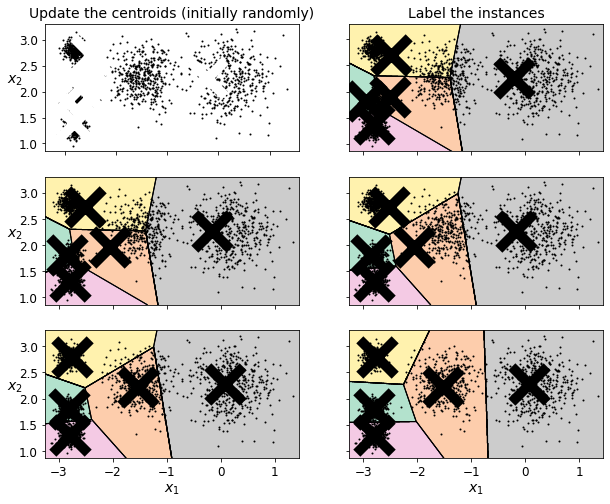

In [464]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

# shows the issue of the algorithm as if it is run multiple times then it can lead to differant solutions from the same data

In [465]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

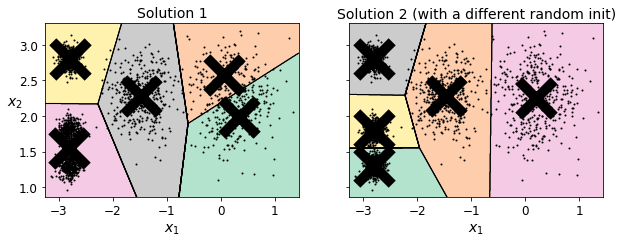

In [466]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

# use of inertia 

In [467]:
kmeans.inertia_

211.59853725816828

In [468]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [469]:
kmeans.score(X)

-211.5985372581683

# shows the 2 inertia scores 

In [470]:
kmeans_rnd_init1.inertia_

219.46374222419135

In [471]:
kmeans_rnd_init2.inertia_

211.59853725816828

# runs the algorithm 10 times by defualt and finds the solution that will minimise the inertia value 

In [472]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

# shows the original modle was the best as after the 10 runs it gives cluster to be 5

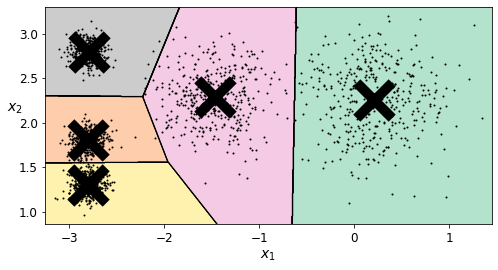

In [473]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

# look to see if the clusters improve by changing the number of clusters

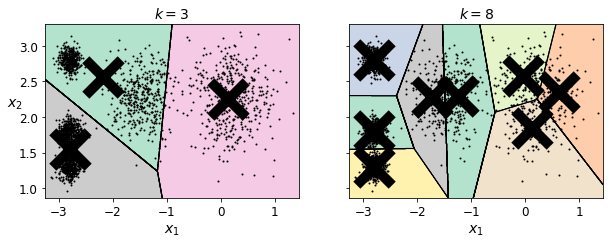

In [474]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [476]:
kmeans_k3.inertia_

653.2167190021557

In [477]:
kmeans_k8.inertia_

119.11983416102889

In [478]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# graph shows the change inertia score as the k number changes

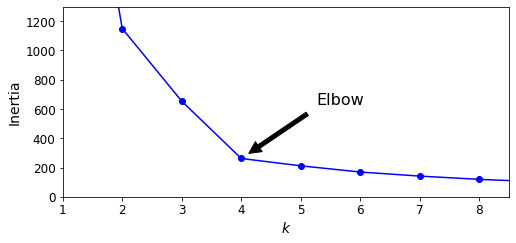

In [479]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

# shows that any k lower than 4 is not optimal for the algorithm 

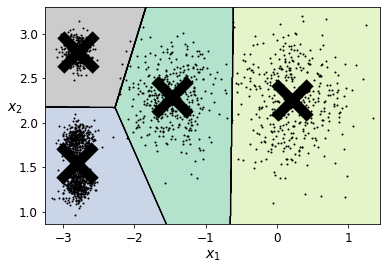

In [480]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [96]:
import os 
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

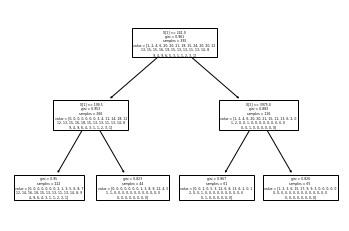

In [76]:
plot_tree(tree_clf);

# accuracy of the decision tree 

In [77]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(Xtrain,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(Xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.061224489795918366


# Linear Regression 

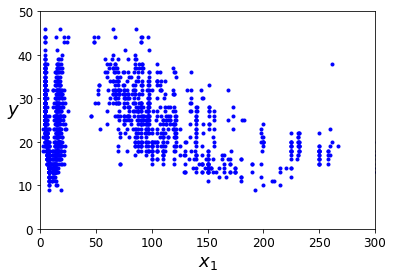

In [78]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 300, 0, 50])
plt.show()

# shows the accuracy of the 10 fold cross validation algorithm

In [79]:
#Importing required libraries
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

 
#Implementing cross validation
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):

     
    model.fit(Xtrain,ytrain)
    pred_values = model.predict(Xtest)
     
    acc = accuracy_score(pred_values , ytest)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366]
Avg accuracy : 0.061224489795918366


# shows how accurate the decision tree is with training and test data 

In [80]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(Xtrain,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(Xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.08163265306122448


# changing the parameters of the decision tree 

In [81]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

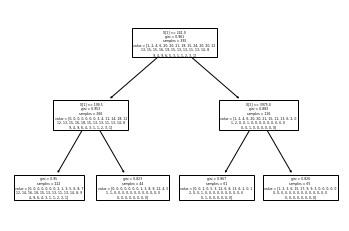

In [82]:
plot_tree(tree_clf);

In [83]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(Xtrain,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(Xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.09183673469387756


# accuracy of the decision tree improves if the depth is increased 

In [84]:
Xtrain2,Xtest2,ytrain2,ytest2=train_test_split(Xtrain,ytrain,test_size=0.3)

In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(Xtrain2,ytrain2)

#Predict the response for test dataset
y_pred = clf.predict(Xtest2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest2, y_pred))

Accuracy: 0.10112359550561797


# accuracy improved when 30% is moved 

In [86]:
Xtrain3,Xtest3,ytrain3,ytest3=train_test_split(Xtrain,ytrain,test_size=0.6)

In [87]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(Xtrain3,ytrain3)

#Predict the response for test dataset
y_pred = clf.predict(Xtest3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest3, y_pred))

Accuracy: 0.0847457627118644


# accuracy decreased but still better than the original model when 60% is moved

# This could show that overfitting has not occured as the score of the original model had a lower accuracy score then the models with the test sets 

# Random Forest Classifier  

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

# mean accuracy score for the classifier

In [89]:
clf.score(X, y, sample_weight=None)

0.20918367346938777

# accuracy of the random forest classifier is significantly higher than the 

In [90]:
from sklearn.linear_model import LogisticRegression

# apply the linear classifier 

In [94]:
# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

LogisticRegression()

# show the mean accuracy on test data without 10 fold 

In [97]:
print(lr.score(Xtrain, ytrain))

0.1360544217687075


# mean accuracy with 10 fold

In [98]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):

     
    model.fit(Xtrain,ytrain)
    pred_values = model.predict(Xtest)
     
    acc = accuracy_score(pred_values , ytest)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366]
Avg accuracy : 0.061224489795918366


# shows that it genralizes better without the 10 fold as the average accurancy for the data is higher 

# MLP 

In [106]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(Xtrain,ytrain)

Iteration 1, loss = 35.67586803
Iteration 2, loss = 34.20777246
Iteration 3, loss = 32.78863583
Iteration 4, loss = 33.38618866
Iteration 5, loss = 33.45725172
Iteration 6, loss = 32.84505761
Iteration 7, loss = 29.89972700
Iteration 8, loss = 31.10516592
Iteration 9, loss = 30.08834469
Iteration 10, loss = 30.38097184
Iteration 11, loss = 29.42176764
Iteration 12, loss = 29.48535993
Iteration 13, loss = 25.97281830
Iteration 14, loss = 25.32023707
Iteration 15, loss = 24.22654600
Iteration 16, loss = 21.85552715
Iteration 17, loss = 18.18307139
Iteration 18, loss = 16.20644916
Iteration 19, loss = 16.18500203
Iteration 20, loss = 14.53266208
Iteration 21, loss = 13.02503261
Iteration 22, loss = 11.77006698
Iteration 23, loss = 10.45089603
Iteration 24, loss = 8.60776501
Iteration 25, loss = 8.11827864
Iteration 26, loss = 8.09405651
Iteration 27, loss = 6.98531221
Iteration 28, loss = 6.29677941
Iteration 29, loss = 5.97015028
Iteration 30, loss = 5.62149547
Iteration 31, loss = 5.570

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [109]:
# Make prediction on test dataset
ypred=clf.predict(Xtest)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(ytest,ypred)

0.01020408163265306

In [111]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(3,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(Xtrain,ytrain)

Iteration 1, loss = 35.79846408
Iteration 2, loss = 35.76355869
Iteration 3, loss = 32.73027196
Iteration 4, loss = 22.40677923
Iteration 5, loss = 11.37370327
Iteration 6, loss = 3.55528686
Iteration 7, loss = 3.55044920
Iteration 8, loss = 3.54503119
Iteration 9, loss = 3.56196509
Iteration 10, loss = 3.59791371
Iteration 11, loss = 3.52928791
Iteration 12, loss = 3.51788195
Iteration 13, loss = 3.51130357
Iteration 14, loss = 3.50494269
Iteration 15, loss = 3.49865342
Iteration 16, loss = 3.49178475
Iteration 17, loss = 3.48558617
Iteration 18, loss = 3.47940357
Iteration 19, loss = 3.47369569
Iteration 20, loss = 3.46802092
Iteration 21, loss = 3.46214047
Iteration 22, loss = 3.45670026
Iteration 23, loss = 3.45173230
Iteration 24, loss = 3.44663453
Iteration 25, loss = 3.44174084
Iteration 26, loss = 3.43669265
Iteration 27, loss = 3.43257001
Iteration 28, loss = 3.42802127
Iteration 29, loss = 3.42376887
Iteration 30, loss = 3.41984483
Iteration 31, loss = 3.41591291
Iteration 32

MLPClassifier(hidden_layer_sizes=(3, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [112]:
# Make prediction on test dataset
ypred=clf.predict(Xtest)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(ytest,ypred)

0.05102040816326531

# score increased when changing layers to 3

In [114]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(3,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.1)

# Fit data onto the model
clf.fit(Xtrain,ytrain)

Iteration 1, loss = 25.66169097
Iteration 2, loss = 25.13318855
Iteration 3, loss = 3.48075439
Iteration 4, loss = 3.44071294
Iteration 5, loss = 4.00554608
Iteration 6, loss = 3.37744634
Iteration 7, loss = 3.35960159
Iteration 8, loss = 3.34831527
Iteration 9, loss = 3.34035903
Iteration 10, loss = 3.33896351
Iteration 11, loss = 3.33888844
Iteration 12, loss = 3.33661671
Iteration 13, loss = 3.33739587
Iteration 14, loss = 3.33884570
Iteration 15, loss = 3.33782741
Iteration 16, loss = 3.33685157
Iteration 17, loss = 3.33566062
Iteration 18, loss = 3.33412545
Iteration 19, loss = 3.33161661
Iteration 20, loss = 3.32958977
Iteration 21, loss = 3.32863668
Iteration 22, loss = 3.32840557
Iteration 23, loss = 3.32670540
Iteration 24, loss = 3.32593554
Iteration 25, loss = 3.32581421
Iteration 26, loss = 3.32557207
Iteration 27, loss = 3.32488340
Iteration 28, loss = 3.32412158
Iteration 29, loss = 3.32434176
Iteration 30, loss = 3.32335111
Iteration 31, loss = 3.32289879
Iteration 32, l

MLPClassifier(hidden_layer_sizes=(3, 5), learning_rate_init=0.1, random_state=5,
              verbose=True)

In [115]:
# Make prediction on test dataset
ypred=clf.predict(Xtest)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(ytest,ypred)

0.05102040816326531

# no change in accuracy when changing learning rate 

In [117]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(3,5),
                    random_state=5,
                    verbose= False,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(Xtrain,ytrain)

MLPClassifier(hidden_layer_sizes=(3, 5), learning_rate_init=0.01,
              random_state=5)

In [118]:
# Make prediction on test dataset
ypred=clf.predict(Xtest)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(ytest,ypred)

0.05102040816326531

# learning rate the same without verbose

In [119]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose= True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(Xtrain,ytrain)

Iteration 1, loss = 35.67586803
Iteration 2, loss = 34.20777246
Iteration 3, loss = 32.78863583
Iteration 4, loss = 33.38618866
Iteration 5, loss = 33.45725172
Iteration 6, loss = 32.84505761
Iteration 7, loss = 29.89972700
Iteration 8, loss = 31.10516592
Iteration 9, loss = 30.08834469
Iteration 10, loss = 30.38097184
Iteration 11, loss = 29.42176764
Iteration 12, loss = 29.48535993
Iteration 13, loss = 25.97281830
Iteration 14, loss = 25.32023707
Iteration 15, loss = 24.22654600
Iteration 16, loss = 21.85552715
Iteration 17, loss = 18.18307139
Iteration 18, loss = 16.20644916
Iteration 19, loss = 16.18500203
Iteration 20, loss = 14.53266208
Iteration 21, loss = 13.02503261
Iteration 22, loss = 11.77006698
Iteration 23, loss = 10.45089603
Iteration 24, loss = 8.60776501
Iteration 25, loss = 8.11827864
Iteration 26, loss = 8.09405651
Iteration 27, loss = 6.98531221
Iteration 28, loss = 6.29677941
Iteration 29, loss = 5.97015028
Iteration 30, loss = 5.62149547
Iteration 31, loss = 5.570

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [120]:
# Make prediction on test dataset
ypred=clf.predict(Xtest)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(ytest,ypred)

0.01020408163265306

# a conclusion that could be made is that the capacity of these deep neural networks to generalize to new data is quite low. The accuracy scores were very low and this could be a result of underfitting occuring as the models may not have been trained on enough examples 